In [1]:
import pandas as pd
from fastai.tabular import *
from fastai.callbacks import *

In [2]:
path = Path('../data')

In [3]:
df = pd.read_csv(path/'02_classification_split_urls.csv', error_bad_lines=False, index_col=0)

In [4]:
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26793,Travel & Tourism,Cornwall,West Briton and Cornwall Advertiser - transcri...,http://freepages.genealogy.rootsweb.ancestry.c...,http,"['freepages', 'genealogy', 'rootsweb', 'ancest...",freepages,genealogy,rootsweb,ancestry,com,NaN
26794,Travel & Tourism,Cornwall,West Cornwall Community Network,http://www.wccn.org.uk/,http,"['www', 'wccn', 'org', 'uk']",www,wccn,org,uk,NaN,NaN
26795,Travel & Tourism,Cornwall,West Penwith Resources,http://www.west-penwith.org.uk/,http,"['www', 'west-penwith', 'org', 'uk']",www,west-penwith,org,uk,NaN,NaN
26796,Travel & Tourism,Cornwall,Yeate Farm - the Granary self-catering accommo...,http://www.yeatefarm.co.uk/,http,"['www', 'yeatefarm', 'co', 'uk']",www,yeatefarm,co,uk,NaN,NaN


In [5]:
len(df.url3.unique())

279

In [6]:
df.url1.unique()

array(['www', 'architecturemps', 'news', 'projects', ..., 'devotedtotravel', 'wikitravel', 'walking',
       'specialolympicswales'], dtype=object)

In [7]:
sample = int(len(df)*0.3)
df_sample = df.sample(sample)
df_sample['is_valid'] = True
df['is_valid'] = False
dfs = [df, df_sample]
df = pd.concat(dfs)
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,"Business, Economy & Industry",Company Web Sites,Comms-Solve Technologies Ltd,http://www.cstl.co.uk/,http,"['www', 'cstl', 'co', 'uk']",www,cstl,co,uk,NaN,NaN,True
16014,"Government, Law & Politics","Politics, Political Theory and Political Systems",Kensington Labour Party,http://kensingtonlabour.com/,http,"['kensingtonlabour', 'com']",kensingtonlabour,com,NaN,NaN,NaN,NaN,True
774,Arts & Humanities,Film / Cinema,Cyfle: The gateway to industry - Y drws i ddiw...,http://www.cyfle.co.uk/,http,"['www', 'cyfle', 'co', 'uk']",www,cyfle,co,uk,NaN,NaN,True
22458,Science & Technology,"Zoology, Veterinary Science and Animal Health",Whale and Dolphin Conservation Society (WDCS),http://www.wdcs.org.uk/,http,"['www', 'wdcs', 'org', 'uk']",www,wdcs,org,uk,NaN,NaN,True


In [8]:
#df.to_csv(path/'03_classification_valid_train.csv')

In [17]:
df = pd.read_csv(path/'03_classification_valid_train.csv')

## Drop 

In [18]:
df = df.drop(['URL','Secondary Category', 'netloc', 'Title',],axis=1)

In [19]:
df

,Unnamed: 0,Primary Category,scheme,url1,url2,url3,url4,url5,url6,is_valid
0,0,Arts & Humanities,http,www,sixty8,com,NaN,NaN,NaN,False
1,1,Arts & Humanities,http,www,abandonedcommunities,co,uk,NaN,NaN,False
2,2,Arts & Humanities,http,www,greekthomson,com,NaN,NaN,NaN,False
3,3,Arts & Humanities,http,www,arabbritishcentre,org,uk,NaN,NaN,False
4,4,Arts & Humanities,http,www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
34832,22885,Society & Culture,http,cadaad,net,NaN,NaN,NaN,NaN,True
34833,11177,Education & Research,http,www,nottingham,ac,uk,NaN,NaN,True
34834,14513,"Government, Law & Politics",http,crhlibdems,org,NaN,NaN,NaN,NaN,True
34835,2531,Arts & Humanities,http,www,susan,croft,btinternet,co,uk,True


In [20]:
df = df.reset_index(drop=True)

In [21]:
procs = [Categorify, FillMissing, Normalize]

In [22]:
dep_var = 'Primary Category'
cat_names = ['scheme', 'url2',
            'url1','url3','url4','url5','url6']



In [23]:
data_tab = (TabularList.from_df(df,cat_names=cat_names, procs=procs)
            .split_from_df('is_valid')
            .label_from_df('Primary Category')
            .databunch(bs=32))

In [24]:
data_tab.show_batch()

scheme,url2,url1,url3,url4,url5,url6,target
http,martinstamper,www,co,uk,#na#,#na#,Society & Culture
http,sportengland,www,org,#na#,#na#,#na#,Society & Culture
http,juryteam,www,org,#na#,#na#,#na#,"Government, Law & Politics"
http,candida-society,www,org,#na#,#na#,#na#,Medicine & Health
http,braintumouruk,www,org,uk,#na#,#na#,Medicine & Health


In [46]:
print(len(data_tab.valid_ds))
print(len(data_tab.train_ds))

8039
26798


In [25]:
data_tab.c

24

In [26]:
def calcHiddenLayer(data, alpha, numHiddenLayers):
    tempData = data.train_ds
    i, o = len(tempData.x.classes), len(tempData.y.classes)
    io = i+o
    return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [27]:
tab_layers = calcHiddenLayer(data_tab,2,1)

In [34]:
loss_func = nn.CrossEntropyLoss()
f1 = FBeta(average='macro')

In [35]:
learn_tab = tabular_learner(data_tab,loss_func=loss_func, 
                            layers=tab_layers,
                            ps=[0.5], 
                            emb_drop=0.05, 
                            metrics=[accuracy,f1])

learn_tab.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


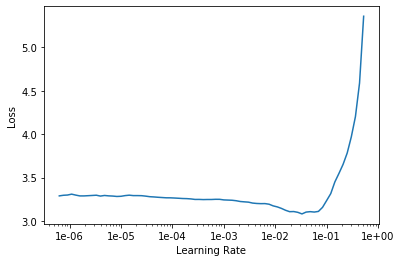

In [36]:
learn_tab.recorder.plot()

In [37]:
learn_tab.fit_one_cycle(40,max_lr=1e-02,
                        callbacks=[SaveModelCallback(learn_tab, 
                                                     every='improvement',
                                                     monitor='f_beta',
                                                     name='best_tab')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.871267,1.414356,0.558776,0.203813,00:06
1,1.629490,1.187884,0.601692,0.249942,00:06
2,1.565695,1.137893,0.610897,0.292842,00:06
3,1.587137,1.169414,0.599328,0.254405,00:06
4,1.477677,1.147777,0.600572,0.248430,00:06
5,1.423295,1.102397,0.607663,0.287935,00:06
6,1.343177,0.976699,0.604180,0.311934,00:06
7,1.303239,0.946771,0.619231,0.356390,00:06
8,1.308177,0.924783,0.623958,0.267456,00:06
9,1.244834,0.931415,0.615997,0.315876,00:06


Better model found at epoch 0 with f_beta value: 0.2038126140832901.
Better model found at epoch 1 with f_beta value: 0.24994201958179474.
Better model found at epoch 2 with f_beta value: 0.29284167289733887.
Better model found at epoch 6 with f_beta value: 0.31193432211875916.
Better model found at epoch 7 with f_beta value: 0.3563903570175171.
Better model found at epoch 13 with f_beta value: 0.4174768924713135.
Better model found at epoch 32 with f_beta value: 0.4267682433128357.
Better model found at epoch 36 with f_beta value: 0.43241629004478455.
Better model found at epoch 37 with f_beta value: 0.43280333280563354.
Better model found at epoch 38 with f_beta value: 0.4420292377471924.


In [38]:
learn_tab.load('best_tab')

Learner(data=TabularDataBunch;

Train: LabelList (26798 items)
x: TabularList
scheme http; url2 sixty8; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url2 abandonedcommunities; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url2 greekthomson; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url2 arabbritishcentre; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url2 aaschool; url1 www; url3 ac; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TabularList
scheme http; url2 orbem; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url2 wordpress; url1 leaderswedeserve; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url2 cambscf; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url2 barrysheerman; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,s

In [39]:
learn_tab.path

PosixPath('.')

In [40]:
learn_tab.export('final_tab.pkl')

In [41]:
learn_tab = load_learner('.','final_tab.pkl')

In [42]:
data_tab.save('tab_data')